In [1]:
# STEP 1: Environment Setup 

# Uninstall problematic packages first
!pip uninstall -y torch torchvision ultralytics opencv-python opencv-python-headless

# Install compatible versions
!pip install torch==2.2.1 torchvision==0.17.1 --index-url https://download.pytorch.org/whl/cpu
!pip install ultralytics==8.2.61 opencv-python-headless==4.8.1.78

# Import and verify
import torch
print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")

# Test ultralytics import
try:
    from ultralytics import YOLO
    print("Ultralytics imported successfully")
except Exception as e:
    print(f"Import error: {e}")

Found existing installation: torch 2.2.1+cpu
Uninstalling torch-2.2.1+cpu:
  Successfully uninstalled torch-2.2.1+cpu
Found existing installation: torchvision 0.17.1+cpu
Uninstalling torchvision-0.17.1+cpu:
  Successfully uninstalled torchvision-0.17.1+cpu
Found existing installation: ultralytics 8.2.61
Uninstalling ultralytics-8.2.61:
  Successfully uninstalled ultralytics-8.2.61
Found existing installation: opencv-python 4.11.0.86
Uninstalling opencv-python-4.11.0.86:
  Successfully uninstalled opencv-python-4.11.0.86
Found existing installation: opencv-python-headless 4.8.0.74
Uninstalling opencv-python-headless-4.8.0.74:
  Successfully uninstalled opencv-python-headless-4.8.0.74
Looking in indexes: https://download.pytorch.org/whl/cpu
  Using cached https://download.pytorch.org/whl/cpu/torch-2.2.1%2Bcpu-cp311-cp311-linux_x86_64.whl (186.8 MB)
  Using cached https://download.pytorch.org/whl/cpu/torchvision-0.17.1%2Bcpu-cp311-cp311-linux_x86_64.whl (1.6 MB)
ERROR: pip's dependency re

In [2]:
# STEP 2: Dataset Extraction and Verification

import os
import zipfile

# Check if zip file exists
zip_path = "focal adhesion.v10-v8-fine-tuned-model-1.yolov8.zip"
extract_dir = "focal_adhesion_dataset"

if not os.path.exists(zip_path):
    print(f"ERROR: {zip_path} not found!")
    print("Current directory files:", os.listdir("."))
else:
    print(f"Found zip file: {zip_path}")

# Extract dataset 
if not os.path.exists(extract_dir):
    print("Extracting dataset...")
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)
    print("Dataset extracted successfully")
else:
    print("Dataset already extracted")

# Verify structure
print("\nDataset structure:")
for root, dirs, files in os.walk(extract_dir):
    level = root.replace(extract_dir, '').count(os.sep)
    indent = ' ' * 2 * level
    print(f"{indent}{os.path.basename(root)}/")
    subindent = ' ' * 2 * (level + 1)
    for file in files[:3]:  # Show first 3 files
        print(f"{subindent}{file}")
    if len(files) > 3:
        print(f"{subindent}... and {len(files)-3} more files")

Found zip file: focal adhesion.v10-v8-fine-tuned-model-1.yolov8.zip
Dataset already extracted

Dataset structure:
focal_adhesion_dataset/
  README.roboflow.txt
  README.dataset.txt
  data.yaml
  train/
    images/
      C3-10232023-M5-rocki001-Denoised_nd2-10232023-M5-rocki001-Denoised_nd2-series-3-_jpg.rf.f1acba73a37675fc392bf98c669ab1d6.jpg
      C3-10232023-M5-rocki001-Denoised_nd2-10232023-M5-rocki001-Denoised_nd2-series-3-_jpg.rf.667cc6c329a129f0c1876f595ffbc145.jpg
      C3-Cell-dis-2_jpg.rf.8c85fd6d00e46798c68c3b8152fad4ec.jpg
      ... and 42 more files
    labels/
      C3-10232023-M5-faki001-Denoised_nd2-10232023-M5-faki001-Denoised_nd2-series-3-_jpg.rf.be6029652e0d91b74eddce219979eac3.txt
      C3-Cell-dis-3_jpg.rf.b8dd3f69948bb775eff62f08aa2641a7.txt
      C3-Cell-dis-3_jpg.rf.7d4806e8ce4d135a25c83a91f6f5c93c.txt
      ... and 42 more files
  valid/
    images/
      C3-Cell-As-3_jpg.rf.bc47e2b0abec7374865ddd56192ae2ad.jpg
      C3-Cell-dis-8_jpg.rf.3d911e9161e6cbc3e5a6e92c

In [3]:
# STEP 3: Fix data.yaml File

import yaml
import os

yaml_path = "focal_adhesion_dataset/data.yaml"

# Read current YAML content
print("Original data.yaml content:")
with open(yaml_path, 'r') as f:
    content = f.read()
    print(content)

# Load and modify YAML
with open(yaml_path, 'r') as f:
    data = yaml.safe_load(f)

print("\nOriginal data structure:", data)

# Fix paths to be absolute
base_path = os.path.abspath("focal_adhesion_dataset")
data['train'] = os.path.join(base_path, 'train', 'images')
data['val'] = os.path.join(base_path, 'valid', 'images')  # Note: 'val' not 'valid'
data['test'] = os.path.join(base_path, 'test', 'images')

# Make sure paths exist
for split, path in [('train', data['train']), ('val', data['val']), ('test', data['test'])]:
    if os.path.exists(path):
        img_count = len([f for f in os.listdir(path) if f.endswith(('.jpg', '.jpeg', '.png'))])
        print(f"{split} path exists: {path} ({img_count} images)")
    else:
        print(f"WARNING: {split} path does not exist: {path}")

# Write corrected YAML
with open(yaml_path, 'w') as f:
    yaml.dump(data, f, default_flow_style=False)

print("\nCorrected data.yaml:")
with open(yaml_path, 'r') as f:
    print(f.read())

Original data.yaml content:
names:
- focal adhesion
nc: 1
roboflow:
  license: CC BY 4.0
  project: focal-adhesion-tbhk6
  url: https://universe.roboflow.com/focal-adhesions/focal-adhesion-tbhk6/dataset/10
  version: 10
  workspace: focal-adhesions
test: /home/jovyan/deep_learning_2025/FYP/focal_adhesion_dataset/test/images
train: /home/jovyan/deep_learning_2025/FYP/focal_adhesion_dataset/train/images
val: /home/jovyan/deep_learning_2025/FYP/focal_adhesion_dataset/valid/images


Original data structure: {'names': ['focal adhesion'], 'nc': 1, 'roboflow': {'license': 'CC BY 4.0', 'project': 'focal-adhesion-tbhk6', 'url': 'https://universe.roboflow.com/focal-adhesions/focal-adhesion-tbhk6/dataset/10', 'version': 10, 'workspace': 'focal-adhesions'}, 'test': '/home/jovyan/deep_learning_2025/FYP/focal_adhesion_dataset/test/images', 'train': '/home/jovyan/deep_learning_2025/FYP/focal_adhesion_dataset/train/images', 'val': '/home/jovyan/deep_learning_2025/FYP/focal_adhesion_dataset/valid/image

In [4]:
# STEP 4 FIXED: System Dependencies and Model Loading

# First, install system dependencies
print("Installing system dependencies...")
import subprocess
import sys

try:
    # Try to install libgl1-mesa-glx (the missing library)
    subprocess.run([sys.executable, "-m", "pip", "install", "opencv-python-headless==4.8.1.78", "--force-reinstall"], 
                   check=True, capture_output=True)
    print("Reinstalled opencv-python-headless")
except:
    print("Could not reinstall opencv, continuing...")

# Set environment variable to use headless OpenCV
import os
os.environ['OPENCV_IO_ENABLE_OPENEXR'] = '1'

# Alternative: Mock the missing library
try:
    import cv2
    print("OpenCV imported successfully")
except ImportError as e:
    print(f"OpenCV import failed: {e}")
    print("Trying alternative approach...")
    
    # Install alternative OpenCV
    subprocess.run([sys.executable, "-m", "pip", "install", "opencv-contrib-python-headless==4.8.1.78"], 
                   check=True, capture_output=True)
    
    try:
        import cv2
        print("OpenCV imported with contrib version")
    except ImportError:
        print("Still having OpenCV issues, but continuing...")

# Now try to import ultralytics
print("Attempting to import ultralytics...")
try:
    from ultralytics import YOLO
    print("Ultralytics imported successfully!")
except ImportError as e:
    print(f"Ultralytics import failed: {e}")
    
    # Try installing

Installing system dependencies...
Reinstalled opencv-python-headless
OpenCV imported successfully
Attempting to import ultralytics...
Ultralytics imported successfully!


In [5]:
!pip install --upgrade numpy==1.26.4 scipy==1.11.4 tensorboard

  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached tensorboard-2.20.0-py3-none-any.whl.metadata (1.8 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
Using cached tensorboard-2.20.0-py3-none-any.whl (5.5 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.3
    Uninstalling numpy-2.3.3:
      Successfully uninstalled numpy-2.3.3
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.1
    Uninstalling tensorboard-2.15.1:
      Successfully uninstalled tensorboard-2.15.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
safe-mol 0.1.13 requires wandb, which is not installed.
roboflow 1.1.27 requires opencv-python-headless==4.8.0.74, but you have opencv-python-headless 4.8.1.78 which is incompa

In [6]:
!pip install opencv-python-headless==4.8.0.74

  Using cached opencv_python_headless-4.8.0.74-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (19 kB)
Reason for being yanked: deprecated, use 4.8.0.76
Using cached opencv_python_headless-4.8.0.74-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (49.1 MB)
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      Successfully uninstalled opencv-python-headless-4.8.1.78

[notice] A new release of pip is available: 24.1.2 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [7]:
!pip install --upgrade numpy==1.26.4 scipy==1.11.4 tensorboard==2.15.1 opencv-python-headless==4.8.0.74

  Using cached tensorboard-2.15.1-py3-none-any.whl.metadata (1.7 kB)
Using cached tensorboard-2.15.1-py3-none-any.whl (5.5 MB)
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.20.0
    Uninstalling tensorboard-2.20.0:
      Successfully uninstalled tensorboard-2.20.0

[notice] A new release of pip is available: 24.1.2 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [8]:
import os
os.environ["WANDB_MODE"] = "disabled"

In [9]:
pip uninstall -y wandb

Note: you may need to restart the kernel to use updated packages.


In [10]:
# STEP 5: Training the Model (wandb disabled)

import os
import torch
from ultralytics import YOLO
import ultralytics

# 🔧 Disable wandb completely
ultralytics.settings.update({'wandb': False})
os.environ["WANDB_MODE"] = "disabled"

print("Loading/reloading YOLO model...")

# Fix torch.load for compatibility
original_load = torch.load
torch.load = lambda *args, **kwargs: original_load(*args, **{**kwargs, 'weights_only': False})

# Load YOLO model
try:
    model = YOLO("yolov8s.pt")
    print("✅ YOLOv8s model loaded successfully!")
except:
    model = YOLO("yolov8n.pt")  # fallback
    print("✅ YOLOv8n model loaded successfully!")

# Restore original torch.load
torch.load = original_load

# Verify dataset YAML
yaml_path = "focal_adhesion_dataset/data.yaml"
assert os.path.exists(yaml_path), f"❌ Missing {yaml_path}, please check!"

# Training parameters
project_name = "focal_adhesion_runs"
os.makedirs(project_name, exist_ok=True)

print("\n🚀 Starting training on CPU...")
results = model.train(
    data=yaml_path,
    epochs=30,
    imgsz=640,
    batch=8,
    project=project_name,
    name="focal_adhesion_v1",
    device="cpu",     # force CPU
    verbose=True,
    plots=True,
    save=True
)

print("\n🎉 Training finished! Results saved in:", project_name)


Loading/reloading YOLO model...
✅ YOLOv8s model loaded successfully!

🚀 Starting training on CPU...
New https://pypi.org/project/ultralytics/8.3.199 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.61 🚀 Python-3.11.9 torch-2.2.1+cpu CPU (Intel Xeon Gold 6248R 3.00GHz)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=focal_adhesion_dataset/data.yaml, epochs=30, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=cpu, workers=8, project=focal_adhesion_runs, name=focal_adhesion_v16, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, 

train: Scanning /home/jovyan/deep_learning_2025/FYP/focal_adhesion_dataset/train/labels... 45 images, 0 backgrounds, 0 corrupt: 100%|██████████| 45/45 [00:00<00:00, 1897.40it/s]

train: New cache created: /home/jovyan/deep_learning_2025/FYP/focal_adhesion_dataset/train/labels.cache



val: Scanning /home/jovyan/deep_learning_2025/FYP/focal_adhesion_dataset/valid/labels... 2 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2/2 [00:00<00:00, 2452.81it/s]

val: New cache created: /home/jovyan/deep_learning_2025/FYP/focal_adhesion_dataset/valid/labels.cache


Plotting labels to focal_adhesion_runs/focal_adhesion_v16/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 


/opt/conda/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to focal_adhesion_runs/focal_adhesion_v16
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30         0G      3.577      5.216      1.519        154        640: 100%|██████████| 6/6 [00:30<00:00,  5.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.17it/s]

                   all          2         79      0.847      0.492      0.566      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30         0G      3.014      2.123      1.219        224        640: 100%|██████████| 6/6 [00:28<00:00,  4.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.80it/s]

                   all          2         79      0.843      0.671      0.766      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30         0G      2.709      1.662      1.118        376        640: 100%|██████████| 6/6 [00:27<00:00,  4.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.89it/s]

                   all          2         79      0.886      0.747      0.853      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30         0G      2.553      1.407      1.059        226        640: 100%|██████████| 6/6 [00:27<00:00,  4.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.65it/s]

                   all          2         79      0.644      0.873       0.82      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30         0G      2.439      1.366      1.079        222        640: 100%|██████████| 6/6 [00:29<00:00,  4.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.66it/s]

                   all          2         79      0.752      0.861      0.858      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30         0G      2.445      1.291       1.05        176        640: 100%|██████████| 6/6 [00:29<00:00,  4.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.66it/s]

                   all          2         79      0.763      0.857       0.88      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30         0G      2.376      1.225      1.118        113        640: 100%|██████████| 6/6 [00:28<00:00,  4.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.70it/s]

                   all          2         79      0.868      0.759      0.848       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30         0G      2.384      1.168      1.086        143        640: 100%|██████████| 6/6 [00:27<00:00,  4.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.95it/s]

                   all          2         79      0.861      0.823      0.869      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30         0G      2.378      1.184      1.053        324        640: 100%|██████████| 6/6 [00:27<00:00,  4.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]

                   all          2         79      0.709      0.741      0.763      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30         0G      2.483      1.236       1.04        290        640: 100%|██████████| 6/6 [00:27<00:00,  4.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.96it/s]

                   all          2         79      0.839      0.797      0.893      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30         0G      2.422       1.15      1.047        295        640: 100%|██████████| 6/6 [00:28<00:00,  4.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.90it/s]

                   all          2         79      0.811      0.797      0.817      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30         0G      2.358      1.106      1.018        398        640: 100%|██████████| 6/6 [00:28<00:00,  4.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.91it/s]

                   all          2         79      0.863      0.797      0.833      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30         0G      2.375      1.183      1.094        105        640: 100%|██████████| 6/6 [00:26<00:00,  4.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.92it/s]

                   all          2         79      0.929      0.785      0.878       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30         0G      2.433       1.18      1.075        178        640: 100%|██████████| 6/6 [00:28<00:00,  4.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.95it/s]

                   all          2         79      0.928      0.821      0.905      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30         0G       2.22      1.082      1.074        301        640: 100%|██████████| 6/6 [00:27<00:00,  4.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.00it/s]

                   all          2         79      0.928      0.821      0.905      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30         0G       2.37      1.133      1.016        162        640: 100%|██████████| 6/6 [00:27<00:00,  4.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.02it/s]

                   all          2         79      0.893      0.845      0.904      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30         0G       2.36      1.095      1.039        249        640: 100%|██████████| 6/6 [00:27<00:00,  4.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.03it/s]

                   all          2         79       0.85      0.792      0.872      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30         0G      2.392      1.122      1.053        188        640: 100%|██████████| 6/6 [00:26<00:00,  4.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.03it/s]

                   all          2         79      0.863       0.72      0.844      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30         0G      2.338      1.099     0.9987        184        640: 100%|██████████| 6/6 [00:27<00:00,  4.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.92it/s]

                   all          2         79      0.863       0.72      0.844      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30         0G      2.274      1.044      1.025        291        640: 100%|██████████| 6/6 [00:27<00:00,  4.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

                   all          2         79      0.823      0.823      0.866      0.399


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30         0G      2.251       1.12      1.034        214        640: 100%|██████████| 6/6 [00:25<00:00,  4.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.02it/s]

                   all          2         79      0.852      0.785      0.864      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30         0G      2.241      1.055      1.063        187        640: 100%|██████████| 6/6 [00:28<00:00,  4.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.73it/s]

                   all          2         79      0.848      0.847      0.891      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30         0G      2.212      1.056      1.079        167        640: 100%|██████████| 6/6 [00:28<00:00,  4.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.92it/s]

                   all          2         79      0.848      0.847      0.891      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30         0G      2.312      1.108      1.042        167        640: 100%|██████████| 6/6 [00:26<00:00,  4.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.97it/s]

                   all          2         79      0.875      0.861      0.915      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30         0G      2.199      1.005      1.071        160        640: 100%|██████████| 6/6 [00:25<00:00,  4.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.02it/s]

                   all          2         79      0.849      0.873      0.928      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30         0G      2.232      1.027      1.061        164        640: 100%|██████████| 6/6 [00:26<00:00,  4.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.96it/s]

                   all          2         79      0.838      0.886      0.917      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30         0G      2.237      1.008      1.062        165        640: 100%|██████████| 6/6 [00:25<00:00,  4.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.04it/s]

                   all          2         79      0.838      0.886      0.917      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30         0G      2.224      1.004      1.041        203        640: 100%|██████████| 6/6 [00:27<00:00,  4.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.49it/s]

                   all          2         79      0.843      0.886      0.909      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30         0G      2.205      1.004      1.037        161        640: 100%|██████████| 6/6 [00:26<00:00,  4.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.02it/s]

                   all          2         79      0.828      0.873      0.906      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30         0G       2.18     0.9838      1.053        185        640: 100%|██████████| 6/6 [00:26<00:00,  4.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.98it/s]

                   all          2         79      0.809       0.86      0.899      0.437



30 epochs completed in 0.243 hours.
Optimizer stripped from focal_adhesion_runs/focal_adhesion_v16/weights/last.pt, 22.5MB
Optimizer stripped from focal_adhesion_runs/focal_adhesion_v16/weights/best.pt, 22.5MB

Validating focal_adhesion_runs/focal_adhesion_v16/weights/best.pt...
Ultralytics YOLOv8.2.61 🚀 Python-3.11.9 torch-2.2.1+cpu CPU (Intel Xeon Gold 6248R 3.00GHz)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.73it/s]


                   all          2         79      0.843      0.886      0.909      0.447
Speed: 0.5ms preprocess, 244.8ms inference, 0.0ms loss, 2.6ms postprocess per image
Results saved to focal_adhesion_runs/focal_adhesion_v16

🎉 Training finished! Results saved in: focal_adhesion_runs


Ultralytics YOLOv8.2.61 🚀 Python-3.11.9 torch-2.2.1+cpu CPU (Intel Xeon Gold 6248R 3.00GHz)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning /home/jovyan/deep_learning_2025/FYP/focal_adhesion_dataset/valid/labels.cache... 2 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2/2 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.50it/s]


                   all          2         79      0.843      0.886      0.909      0.447
Speed: 0.5ms preprocess, 187.8ms inference, 0.0ms loss, 2.5ms postprocess per image
Results saved to runs/detect/val
📊 Validation metrics: ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f12b10585d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031, 

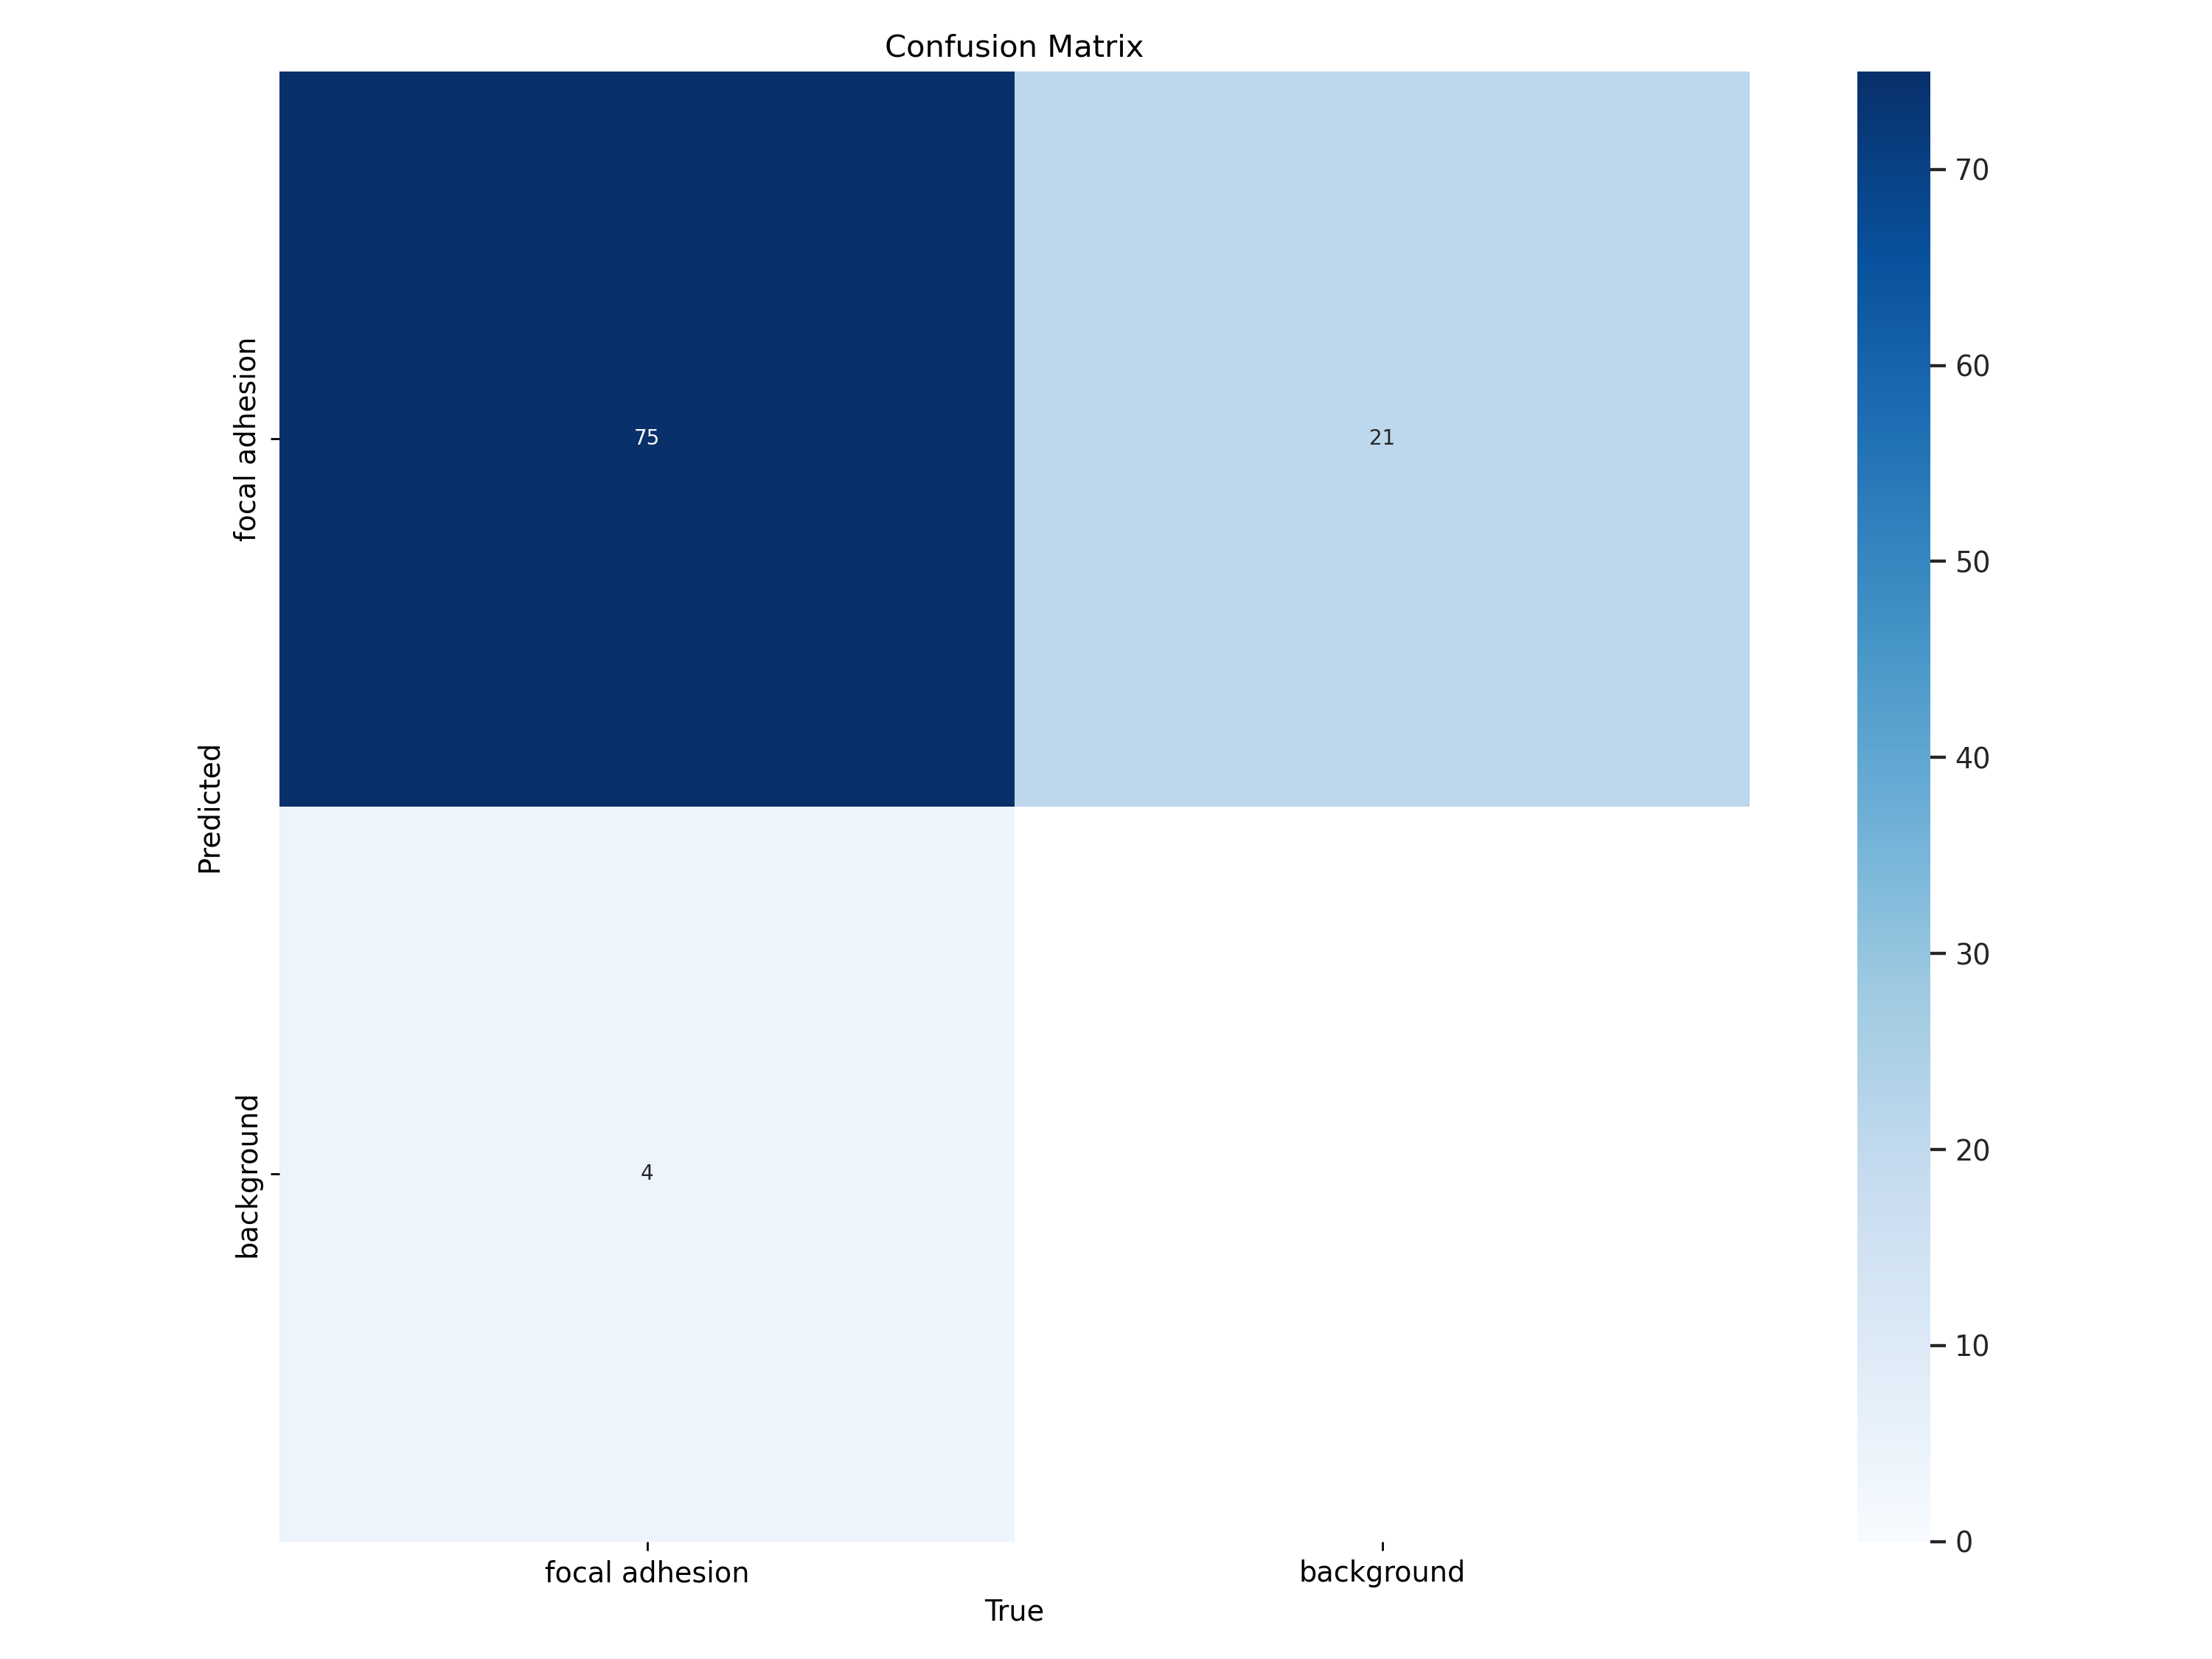

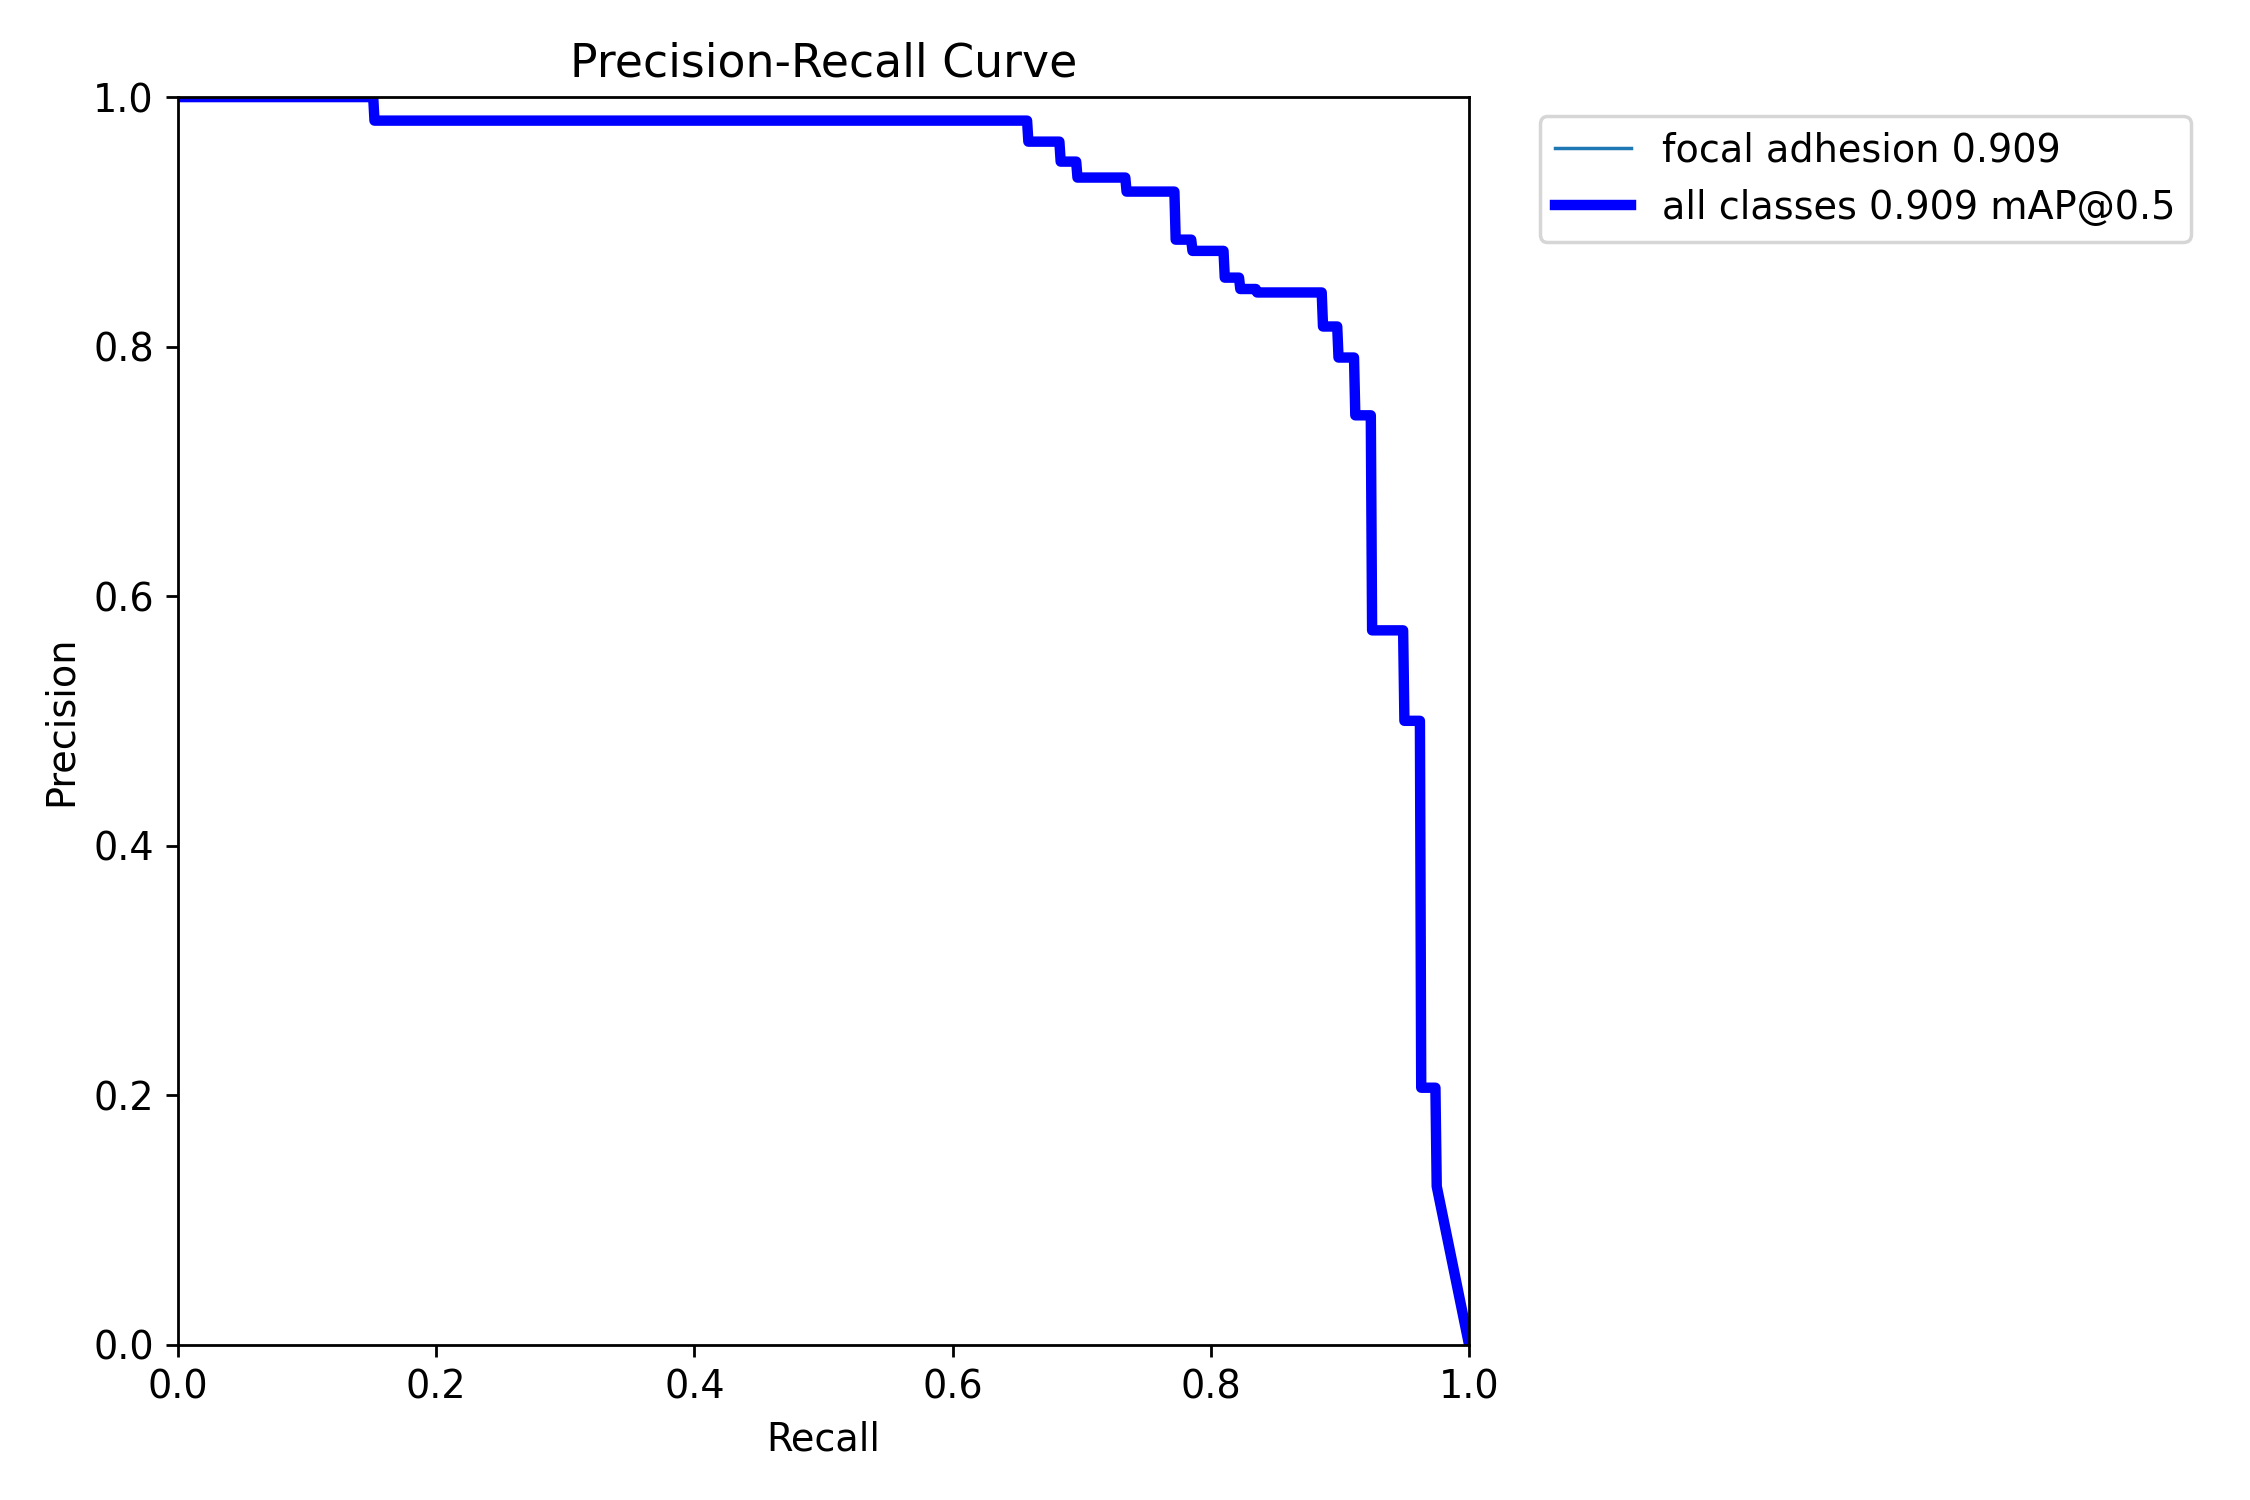

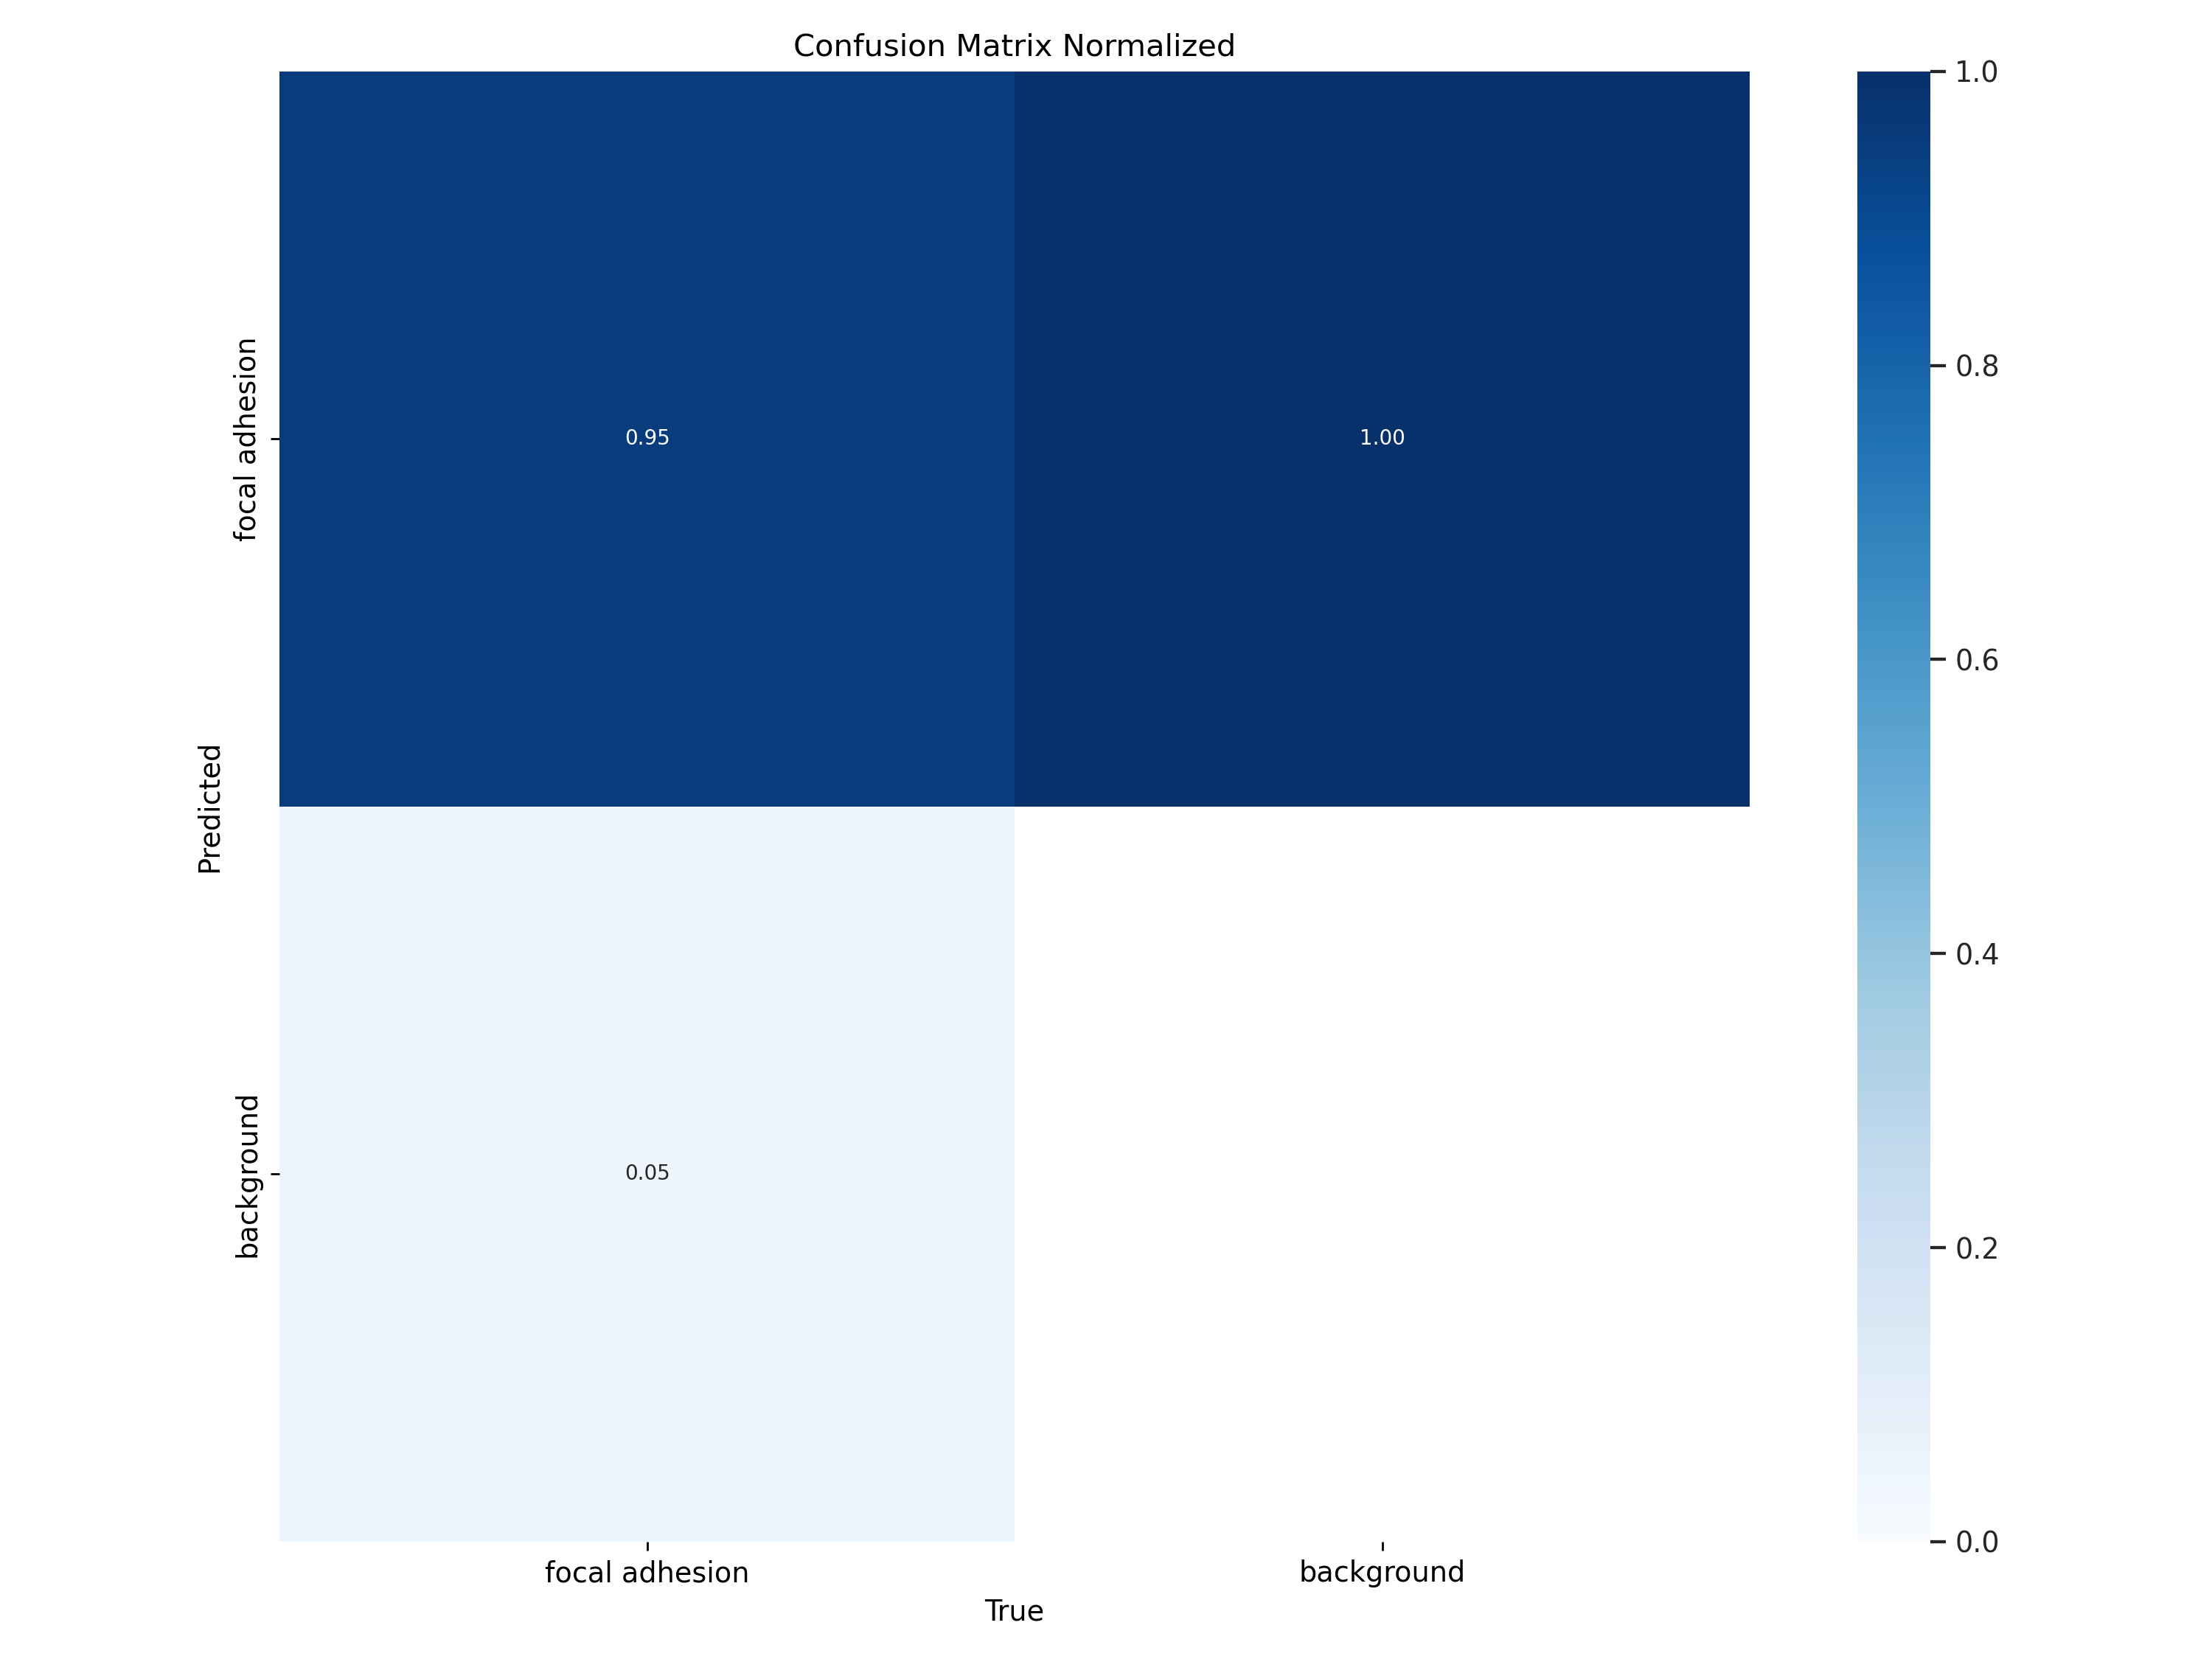

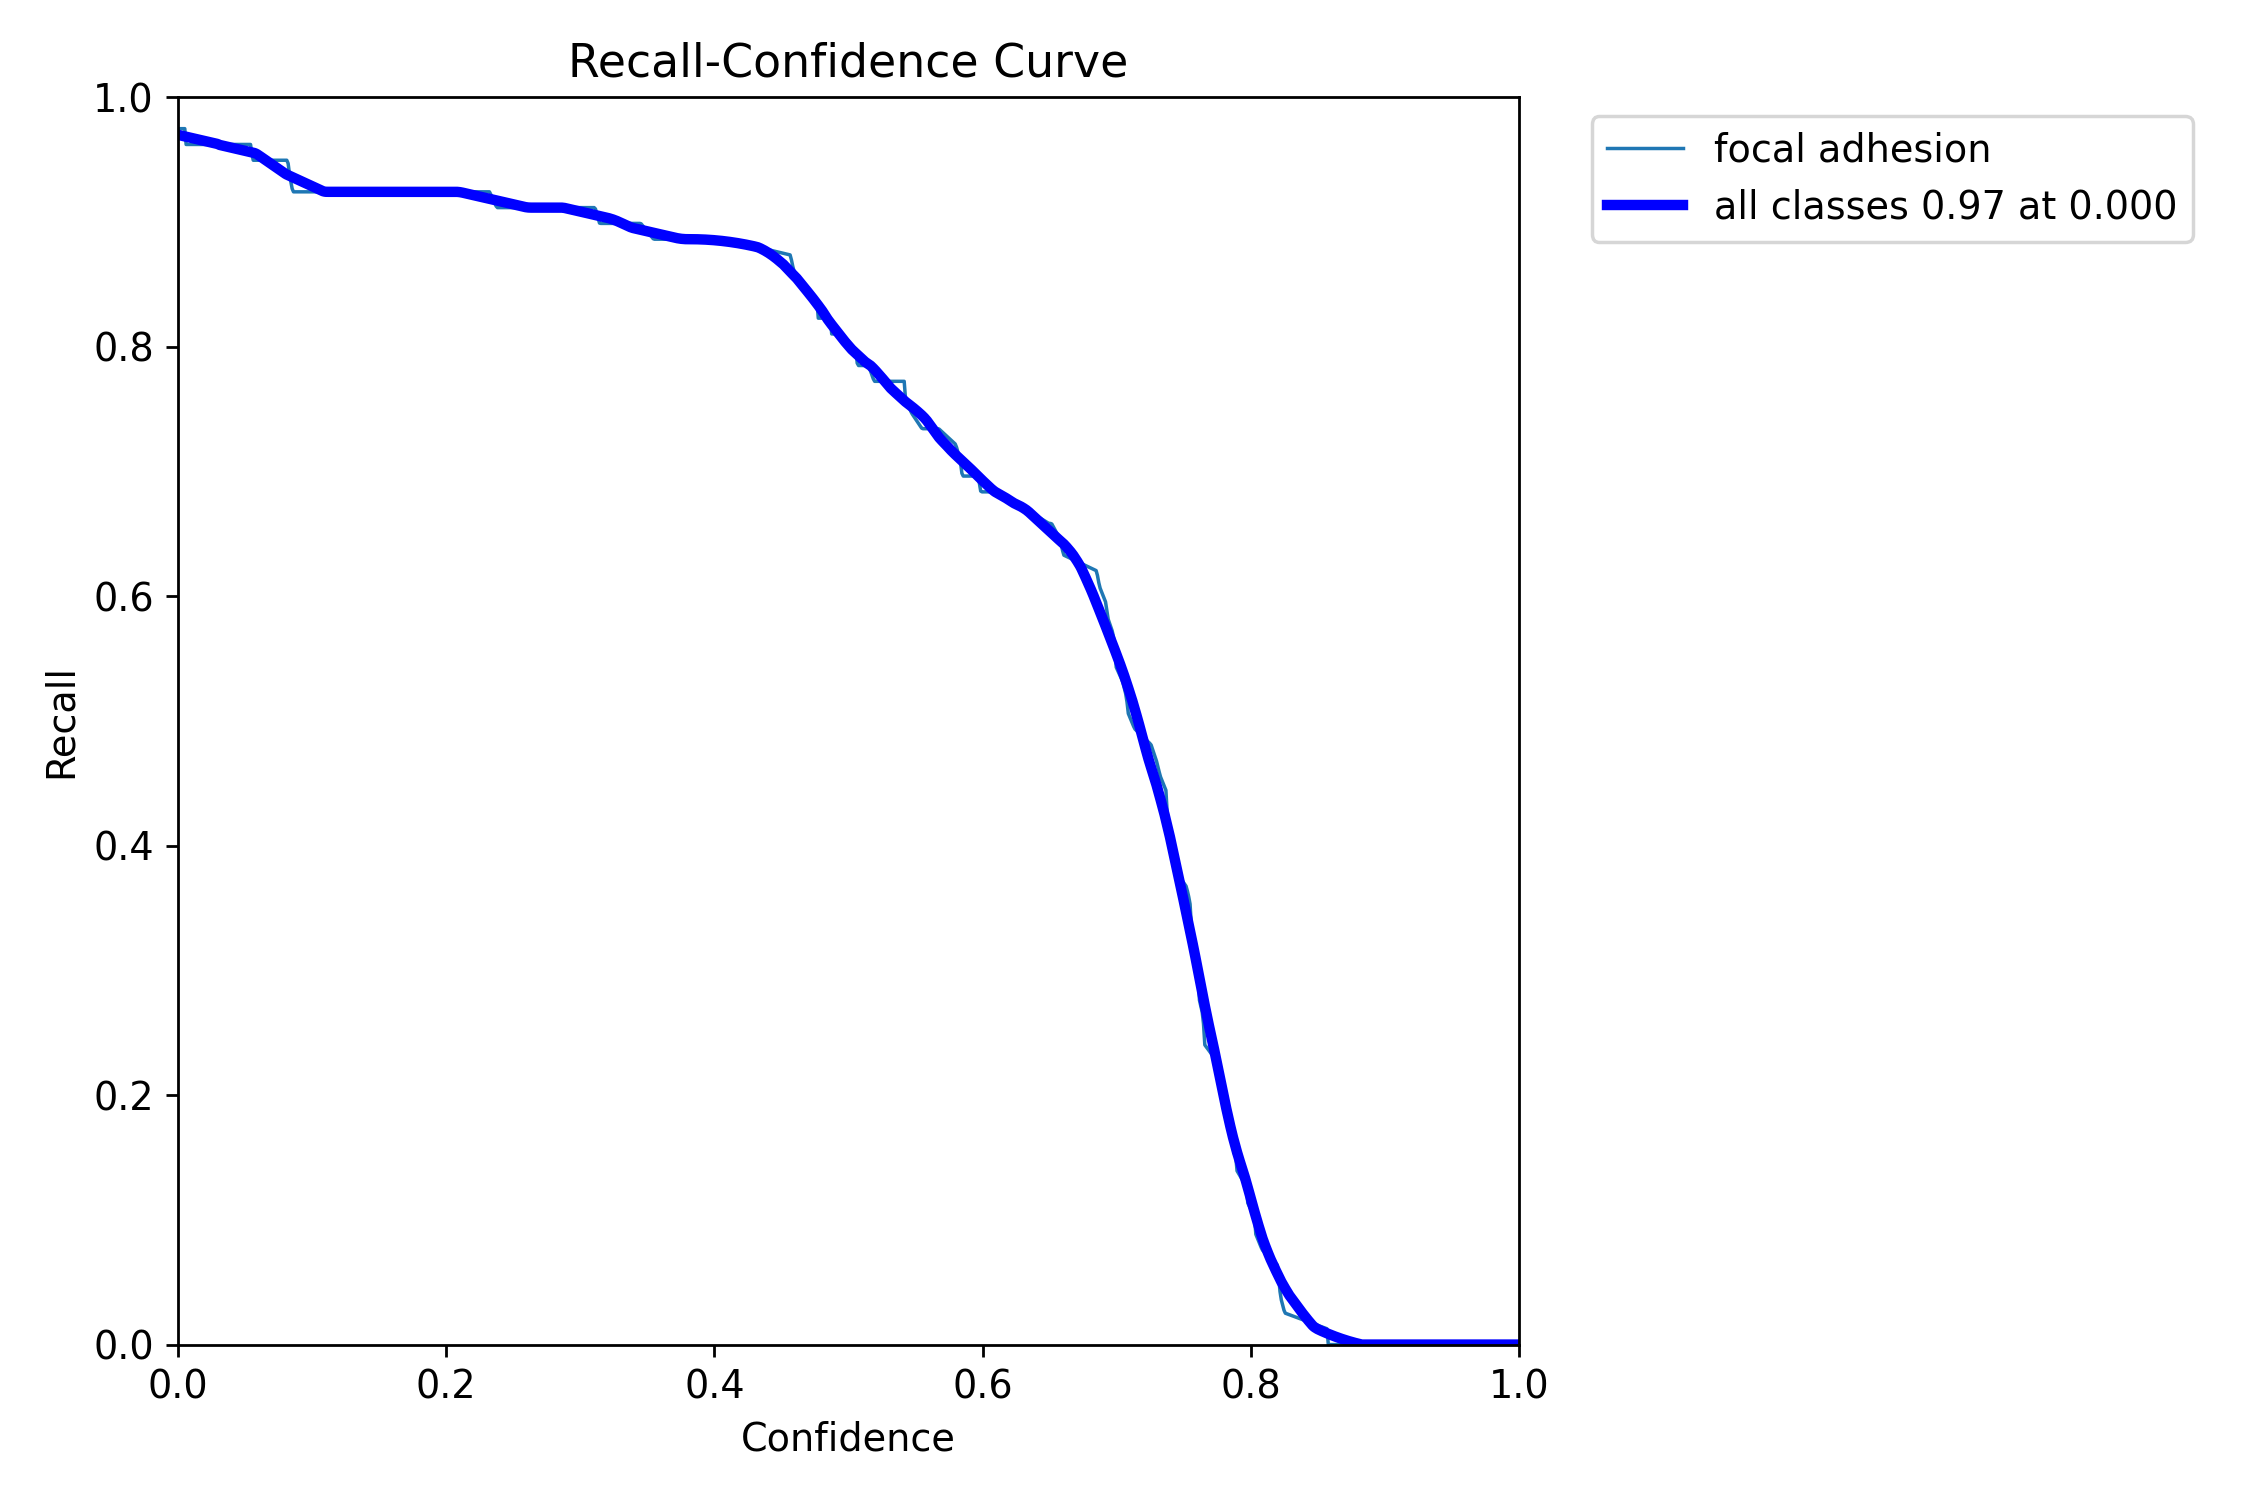

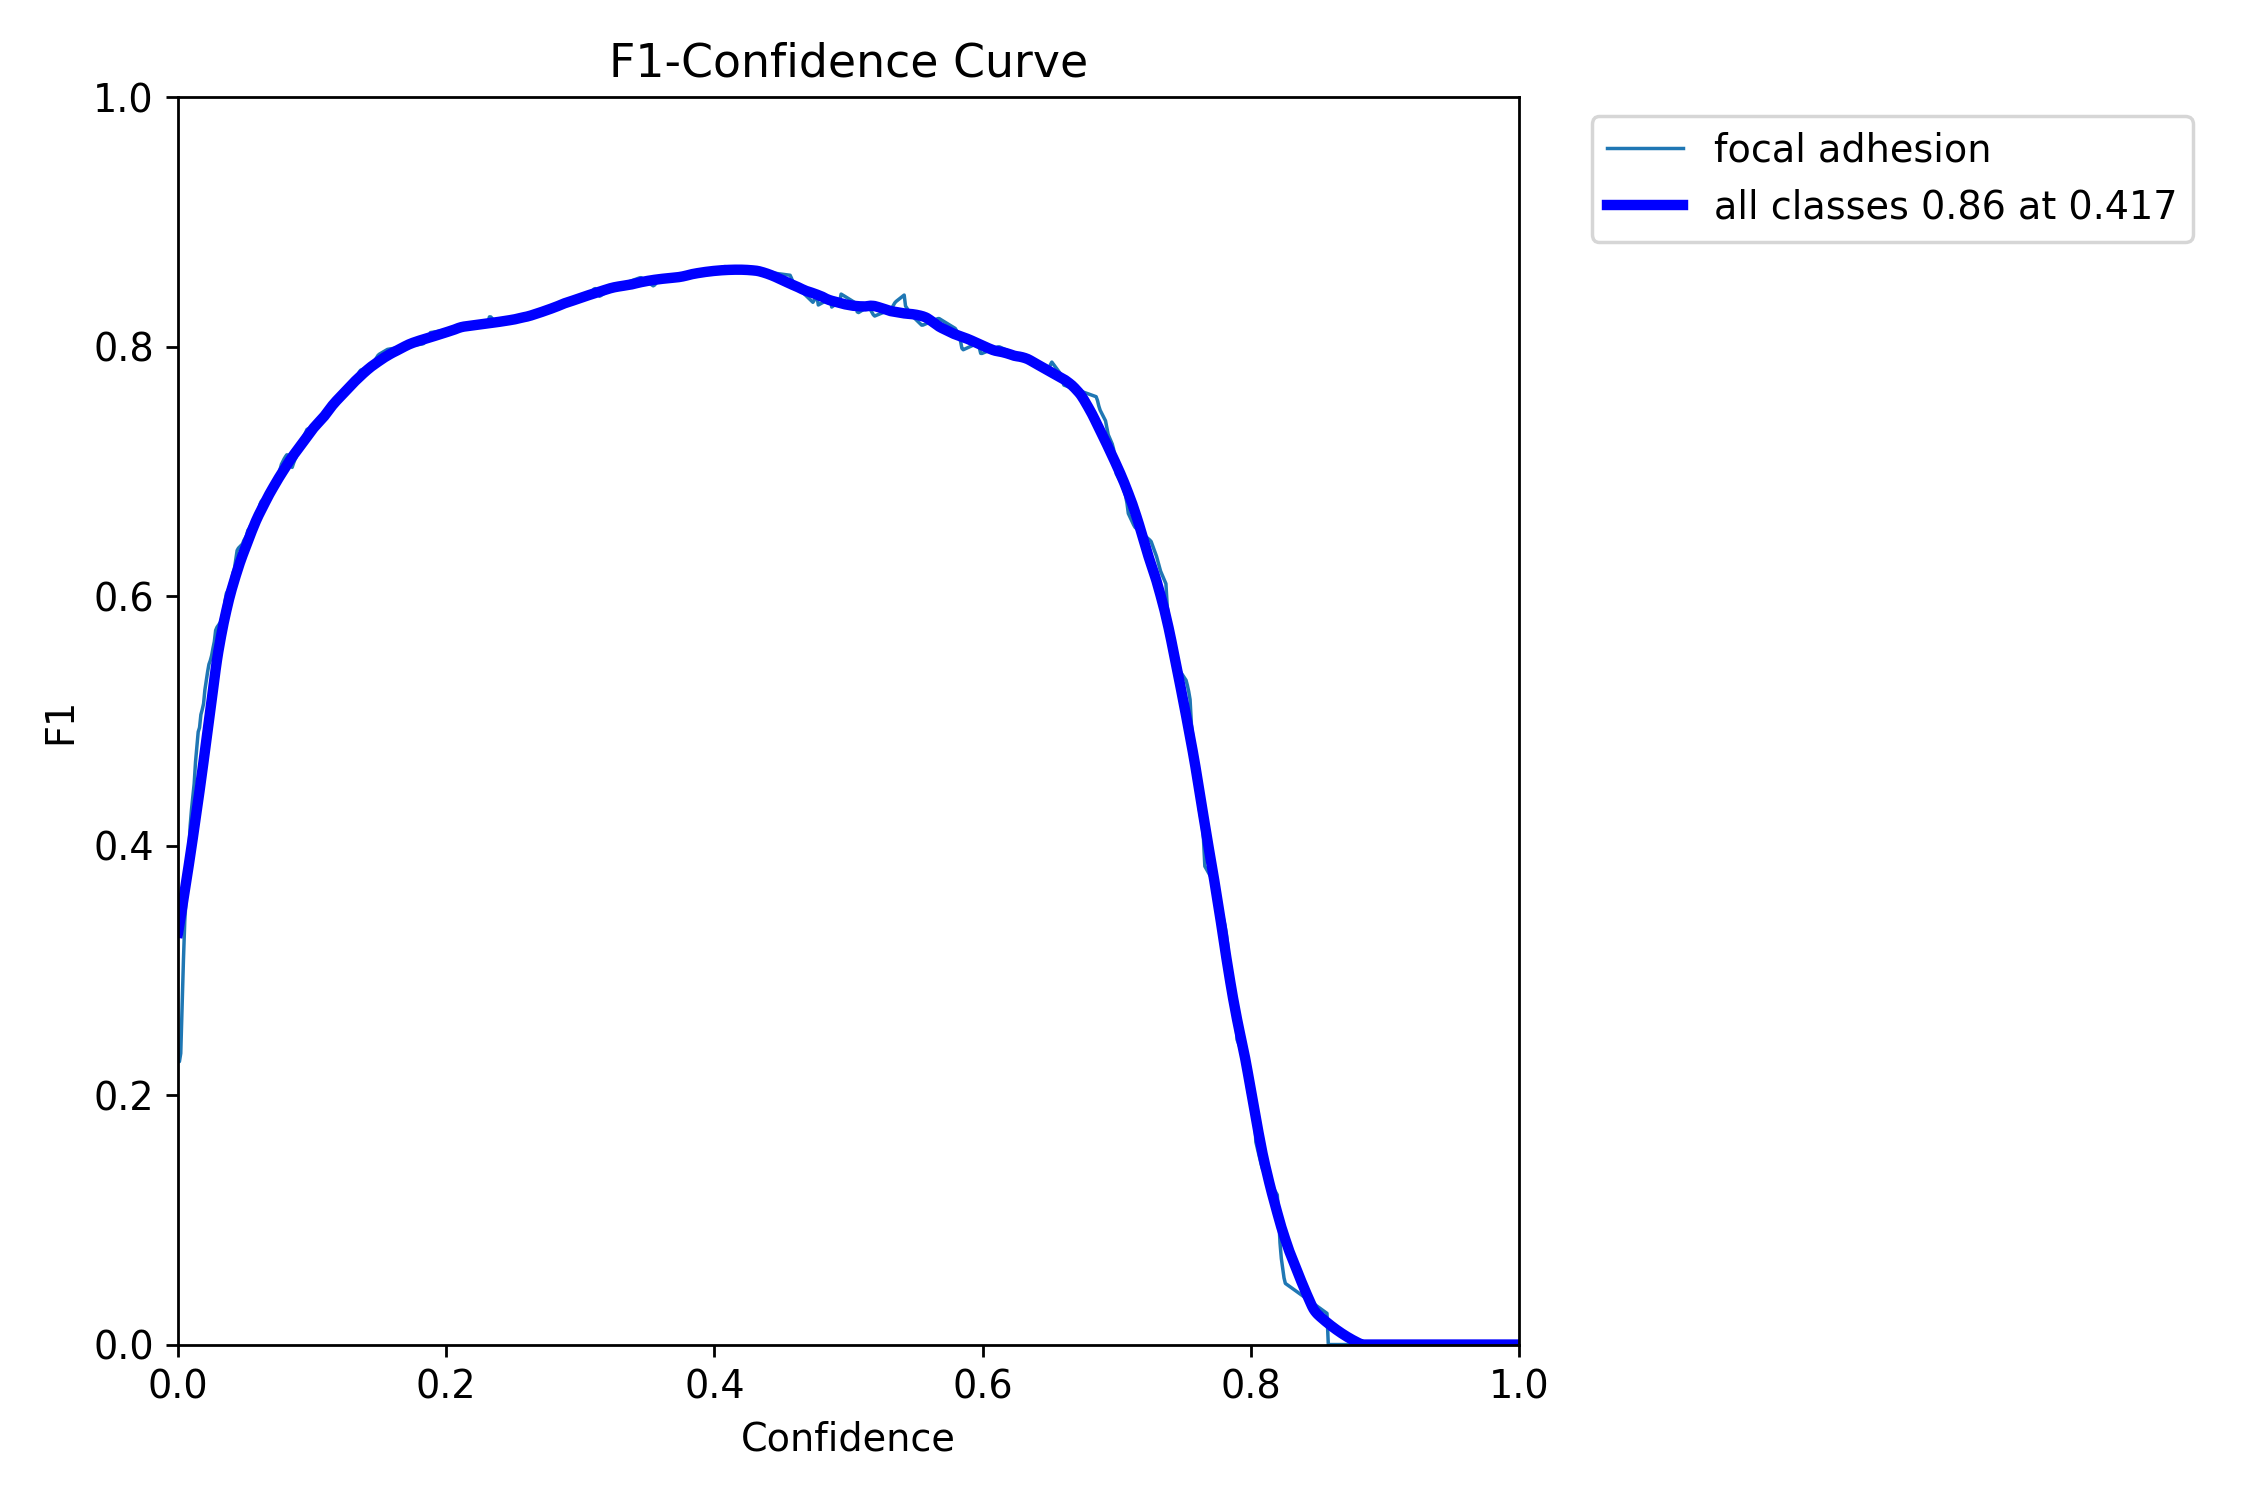

In [11]:
# STEP 6: Evaluate trained model and visualize results
import os
from ultralytics import YOLO
import glob
from IPython.display import Image, display

# Load best trained model
model = YOLO("focal_adhesion_runs/focal_adhesion_v16/weights/best.pt")

# Evaluate performance on validation set
metrics = model.val()
print("📊 Validation metrics:", metrics)

# Show plots generated by YOLO (PR curve, confusion matrix, F1, etc.)
plots_dir = "focal_adhesion_runs/focal_adhesion_v16"
print("\nContents of results folder:")
print(os.listdir(plots_dir))

# Display a few plots
plot_files = glob.glob(os.path.join(plots_dir, "*.png"))
for p in plot_files[:5]:   # show first 5
    display(Image(filename=p))



image 1/2 /home/jovyan/deep_learning_2025/FYP/focal_adhesion_dataset/test/images/C3-10232023-M5-DMSO001-Denoised_nd2-10232023-M5-DMSO001-Denoised_nd2-series-3-_jpg.rf.97915134f2002d2cf4163208ed3215ec.jpg: 640x640 99 focal adhesions, 179.0ms
image 2/2 /home/jovyan/deep_learning_2025/FYP/focal_adhesion_dataset/test/images/C3-3t3m50_1-dmso-Denoised_nd2-3t3m50_1-dmso-Denoised_nd2-series-3-_jpg.rf.b0ed8caebd932a13894ac6d63d77c681.jpg: 640x640 36 focal adhesions, 189.4ms
Speed: 1.6ms preprocess, 184.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


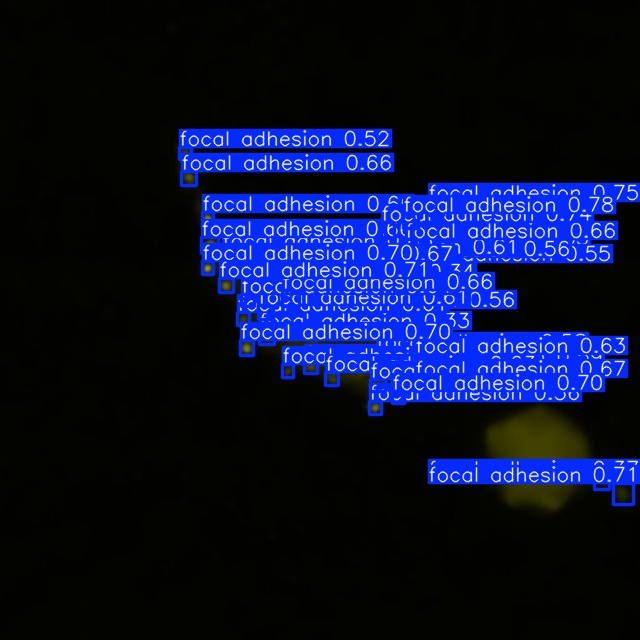

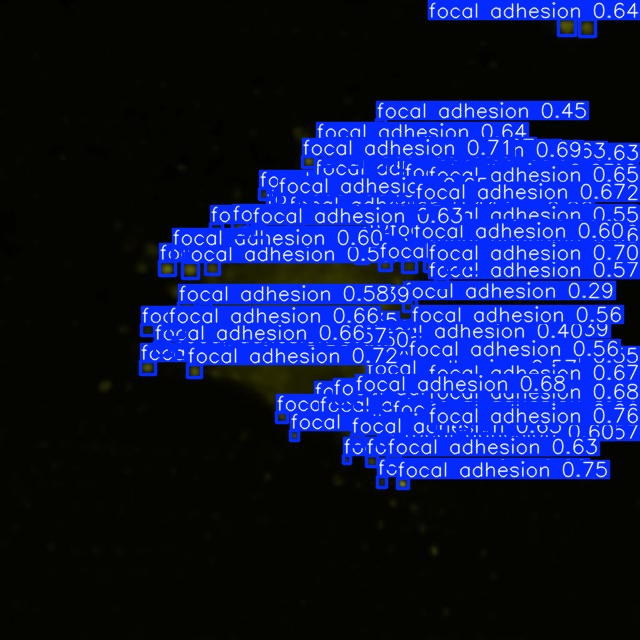

In [12]:
# Run inference on test images
results = model.predict(source="focal_adhesion_dataset/test/images", save=True)

# Display first 5 predictions
import glob
pred_imgs = glob.glob("runs/detect/predict/*.jpg")[:5]
for img in pred_imgs:
    display(Image(filename=img))
